In [107]:
import pandas as pd
import numpy as np
from sklearn import metrics
import statsmodels as sms
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [118]:
class my_linear_regression(my_cross_validation, my_metrics):
    """ Contains methods for calculating linear regression"""
    def __init__(self,x, y):
        self.x = x
        self.y = y
        
    def fit(self):
        self.model = LinearRegression.fit(self.x, self.y)
        return self.model 
        
class my_cross_validation:
    """ Methods for creating a train-test split on the data or k-fold cross-validation. 
    Takes in the percentage of data to be withheld for testing or the number of 
    folds that data will be split into for cross-validation. """
    
    def __init__(self, x, y, random_state = 1, test_size = 0.2, k=3):
        self.test_size = test_size
        self.k = k
        self.x = x
        self.y = y
        self.random_state = random_state
        
    def data_split(self):
        
        """ Split data into training and test sets accoridng to specified test size 
        using sklearn.model_selection.train_test_split"""
        
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(
            self.x, 
            self.y, 
            self.test_size, 
            self.random_state)
        return x_train, x_test, y_train, y_test
    
    def k_fold_crossvalidate(self):
        
        """K Fold cross-validator usign sklearn.model_selection.cross_validate"""
        
        from sklearn.model_selection import cross_validate
        cv = cross_validate.KFold(n_splits=self.k, random_state=self.random_state, shuffle=True)
        return cv


#taken from https://dziganto.github.io/classes/data%20science/linear%20regression/machine%20learning/object-oriented%20programming/python/Understanding-Object-Oriented-Programming-Through-Machine-Learning/

class my_metrics:
    
    """
    Methods for computing useful regression metrics
    
    sse: Sum of squared errors
    sst: Total sum of squared errors (actual vs avg(actual))
    r_squared: Regression coefficient (R^2)
    adj_r_squared: Adjusted R^2
    mse: Mean sum of squared errors
    """
    
    def __init__(self, x, y, model):
        self.data = x
        self.target = y
        self.model = model
        # degrees of freedom population dep. variable variance
        self._dft = x.shape[0] - 1   
        # degrees of freedom population error variance
        self._dfe = x.shape[0] - X.shape[1] - 1  
        
    def sse():
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
        return self.adj_r_sq_
    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.model.predict(self.data) - self.target) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  ('adj_r^2:', self.adj_r_squared()))
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

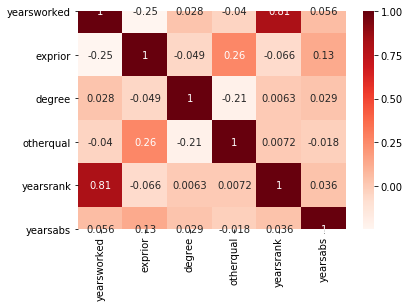

In [112]:
#import salary dataset, removing NAs
df = pd.read_csv("salary.csv")
df = df.dropna()

#visually show high correlation between yearsworked and yearsrank
cor = x1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

x1 = df[['yearsworked', 'exprior', 'degree', 'otherqual', 'yearsrank', 'yearsabs']]
x2 = df[['yearsworked', 'degree', 'exprior', 'otherqual', 'yearsabs']] #without yearsrank
y = df['salary']

In [113]:
#high correlation between years worked and years worked at specific rank
pearsonr(df.yearsworked, df.yearsrank)

(0.8134557540055777, 2.3444736582811158e-122)

In [114]:
lr = LinearRegression(normalize=True)

#model with years_rank
model1 = lr.fit(x1,y)
r_squared1 = model1.score(x1,y)
print(f"r2: {round(r_squared1,2)}")


r2: 0.52


In [115]:
#model w_out years rank
model2 = lr.fit(x2,y)
r_squared2 = model2.score(x2,y)
print(f"r2: {round(r_squared2,2)}")

r2: 0.51


In [121]:
cv = my_cross_validation(np.array(x1), np.array(y), test_size=0.1, random_state = 2)

cv.data_split()


TypeError: Singleton array array(0.1) cannot be considered a valid collection.

In [84]:
#from webster
class Slr():
    def __init__(self, data1, data2):
        self.d1 = data1
        self.d2 = data2

    def split_data(self):
        from sklearn import model_selection as md
        models = {}
        data = {}
        for i in [0.20, 0.40, 0.30]:
            X_train, X_test, y_train, y_test = md.train_test_split(self.d1, self.d2, test_size=i, random_state=101)
            model = self.fit(X_train, y_train)
            y_predict = model.predict(X_test)
            
            models[str(i)] = [model]
            data[str(i)] = [ X_test, y_test]

        return models, data
    
    def score_split(self):
        models, data_models = self.split_data()
        
        scores = []
        for k, mdl in models.items():
            score = mdl[0].score(data_models[k][0], data_models[k][1])
            models[k].append(score)
            scores.append(score)
        max_score = max(scores)
        for x, y in models.items():
            if max_score in y:
                print(y)
                return x, y
            
    def fit(self, x, y):
        from sklearn.linear_model import LinearRegression as LR
        self.model = LR().fit(x, y)
        return self.model 
    
    def regplot(self):
        """Takes in two series and creates a scatter plot with confidence intervals and trend line
        d1 = Series on x axis
        d2 = Series on y axis
        """
        plt.figure(figsize=(16, 10))
        ax = sns.regplot(self.d1,self.d2)
        plt.show()
        

In [85]:
web_model1 = Slr(x1,y)
web_model1.score_split()

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 0.5890390322166557]


('0.2',
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.5890390322166557])